In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets

#Loading dataset from sklearn
flowers = datasets.load_iris()
#And displaying all the columns of that dataset imported.
dir(flowers)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

     0    1    2    3
0  5.1  3.5  1.4  0.2
1  4.9  3.0  1.4  0.2
2  4.7  3.2  1.3  0.2
3  4.6  3.1  1.5  0.2
4  5.0  3.6  1.4  0.2
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


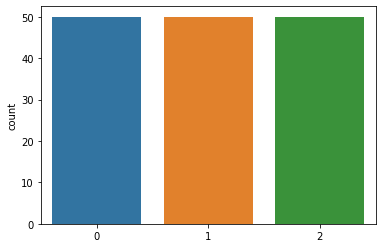

In [2]:
#Now, here we are taking the data, from flowers
df = pd.DataFrame(flowers.data)
print(df.head(5))
#And checking the target data.
print(flowers.target)

#And now we are checking how many value are there in each categories of target.
sns.countplot(flowers.target)

In [10]:
#Here, we are simply, spliting the df and the target into train and test.
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df,flowers.target,test_size = 0.2)

#This is the part, where we are importing the RandomForestClassifier.
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 5)

#Here, we are training the model.
model.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [11]:
#we, are simply checking the, the percentage of match or accuracy.
model.score(x_test, y_test)

0.9

In [12]:
#Here, we predict the value of x_test.
l = model.predict(x_test)
print(l)

[1 2 2 1 1 1 0 0 1 1 1 1 2 2 1 0 1 0 1 1 0 0 2 2 2 1 2 1 2 2]


In [13]:
#Again, after prediction, we compare the l values with y_test. And display the accuracy
model.score(x_test, y_test)

0.9

In [14]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, l)
print(cm)

print(flowers.target_names)

[[ 6  0  0]
 [ 0 12  1]
 [ 0  2  9]]
['setosa' 'versicolor' 'virginica']


Text(24.0, 0.5, 'Truth')

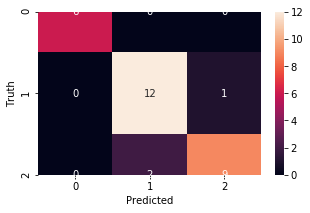

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
#import seaborn as sns
plt.figure(figsize=(5,3))
sns.heatmap(cm,annot=True)
#plt.show(l,y_test)
plt.xlabel('Predicted')
plt.ylabel('Truth')